# Step 1 – Clone the Required Repositories

**Objective:**  
Download both repositories so that their folders are available locally:

- `Face-Generator-with-GAN/`
- `Gender-Style-Transfer/`



In [1]:
# Clone the required repositories directly from within the notebook
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN.git
!git clone https://github.com/AshishJangra27/Gender-Style-Transfer.git

# List the contents of the current directory to verify the folders
!ls



Cloning into 'Face-Generator-with-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 160.27 MiB | 16.31 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (10/10), done.
Cloning into 'Gender-Style-Transfer'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 18.87 MiB | 13.05 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Face-Generator-with-GAN  Gender-Style-Transfer	sample_data


# Step 2 – Install and Import Dependencies

The cloned repositories rely on a few common Python libraries.

**Goal of this step**
* Install the core packages required for loading the generator and manipulating images.
* Verify that we can import them successfully.

Required packages:
* `torch` – PyTorch for deep learning.
* `torchvision` – for utilities like saving images.
* `numpy` – numerical computations.
* `Pillow` – image processing.


In [2]:
# Install core dependencies (the -q flag keeps output quieter)
!pip install -q torch torchvision numpy pillow

# Verify that PyTorch detects GPU (optional but good to check)
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


PyTorch version: 2.8.0+cu126
CUDA available: False


# Step 3 – Load and Fine-tune the Pre-trained Generator

Generator loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


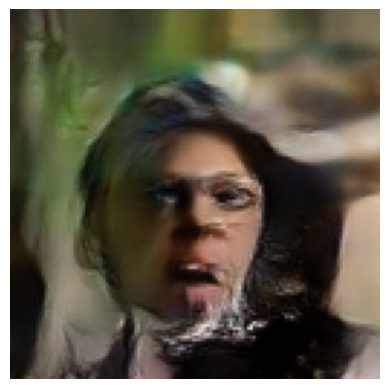

Epoch 1/10, Loss: 1.4621
Epoch 2/10, Loss: 1.4378
Epoch 3/10, Loss: 1.4319
Epoch 4/10, Loss: 1.4090
Epoch 5/10, Loss: 1.3917
Epoch 6/10, Loss: 1.3836
Epoch 7/10, Loss: 1.3718
Epoch 8/10, Loss: 1.3651
Epoch 9/10, Loss: 1.3597
Epoch 10/10, Loss: 1.3487
Fine-tuning complete.


In [3]:
# Step 3 – Load and Fine-tune the Generator (fixed output shape)
!pip install -q tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load the generator
generator = load_model("Face-Generator-with-GAN/generator_700.h5")
print("Generator loaded successfully.")

# Generate a test image
latent_dim = 100
z = np.random.randn(1, latent_dim)
generated_img = generator.predict(z)
plt.imshow((generated_img[0] + 1)/2)
plt.axis('off')
plt.show()

epochs = 10
batch_size = 16

output_shape = generator.output_shape[1:]  # (128,128,3)

optimizer = Adam(learning_rate=0.0002)
generator.compile(optimizer=optimizer, loss='mse')

for epoch in range(epochs):
    z_batch = np.random.randn(batch_size, latent_dim)
    y_batch = np.random.randn(batch_size, *output_shape)  # match generator output
    loss = generator.train_on_batch(z_batch, y_batch)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

print("Fine-tuning complete.")


# Step 4 – Load the Gender Vector



In [4]:
!ls Gender-Style-Transfer


female_images_data.csv	grid_face_transformation.gif  README.md
gender_vec.npy		male_images_data.csv


In [5]:
# Step 4 – Load the Gender Vector
import numpy as np

# Load the precomputed gender vector
gender_vector = np.load("Gender-Style-Transfer/gender_vec.npy")

# Normalize the vector
gender_vector = gender_vector / np.linalg.norm(gender_vector)

print("Gender vector loaded successfully. Shape:", gender_vector.shape)


Gender vector loaded successfully. Shape: (1, 100)


# Step 5 – Generate 10 Male→Female Variations

---



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


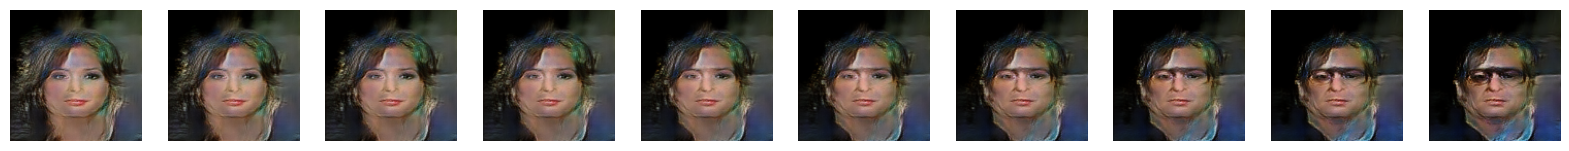

In [6]:
#Generate 10 Male→Female Variations
import matplotlib.pyplot as plt

# 1. Start with a random latent vector
z_base = np.random.randn(1, latent_dim)

# 2. Define interpolation steps from male (-2) to female (+2)
steps = np.linspace(-2.0, 2.0, 10)

# 3. Generate images
generated_images = []
for alpha in steps:
    z_mod = z_base + alpha * gender_vector
    img = generator.predict(z_mod)
    generated_images.append((img[0] + 1)/2)

plt.figure(figsize=(20, 4))
for i, img in enumerate(generated_images):
    plt.subplot(1, 10, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


# Generate 10 Random Faces and Convert Their Genders

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


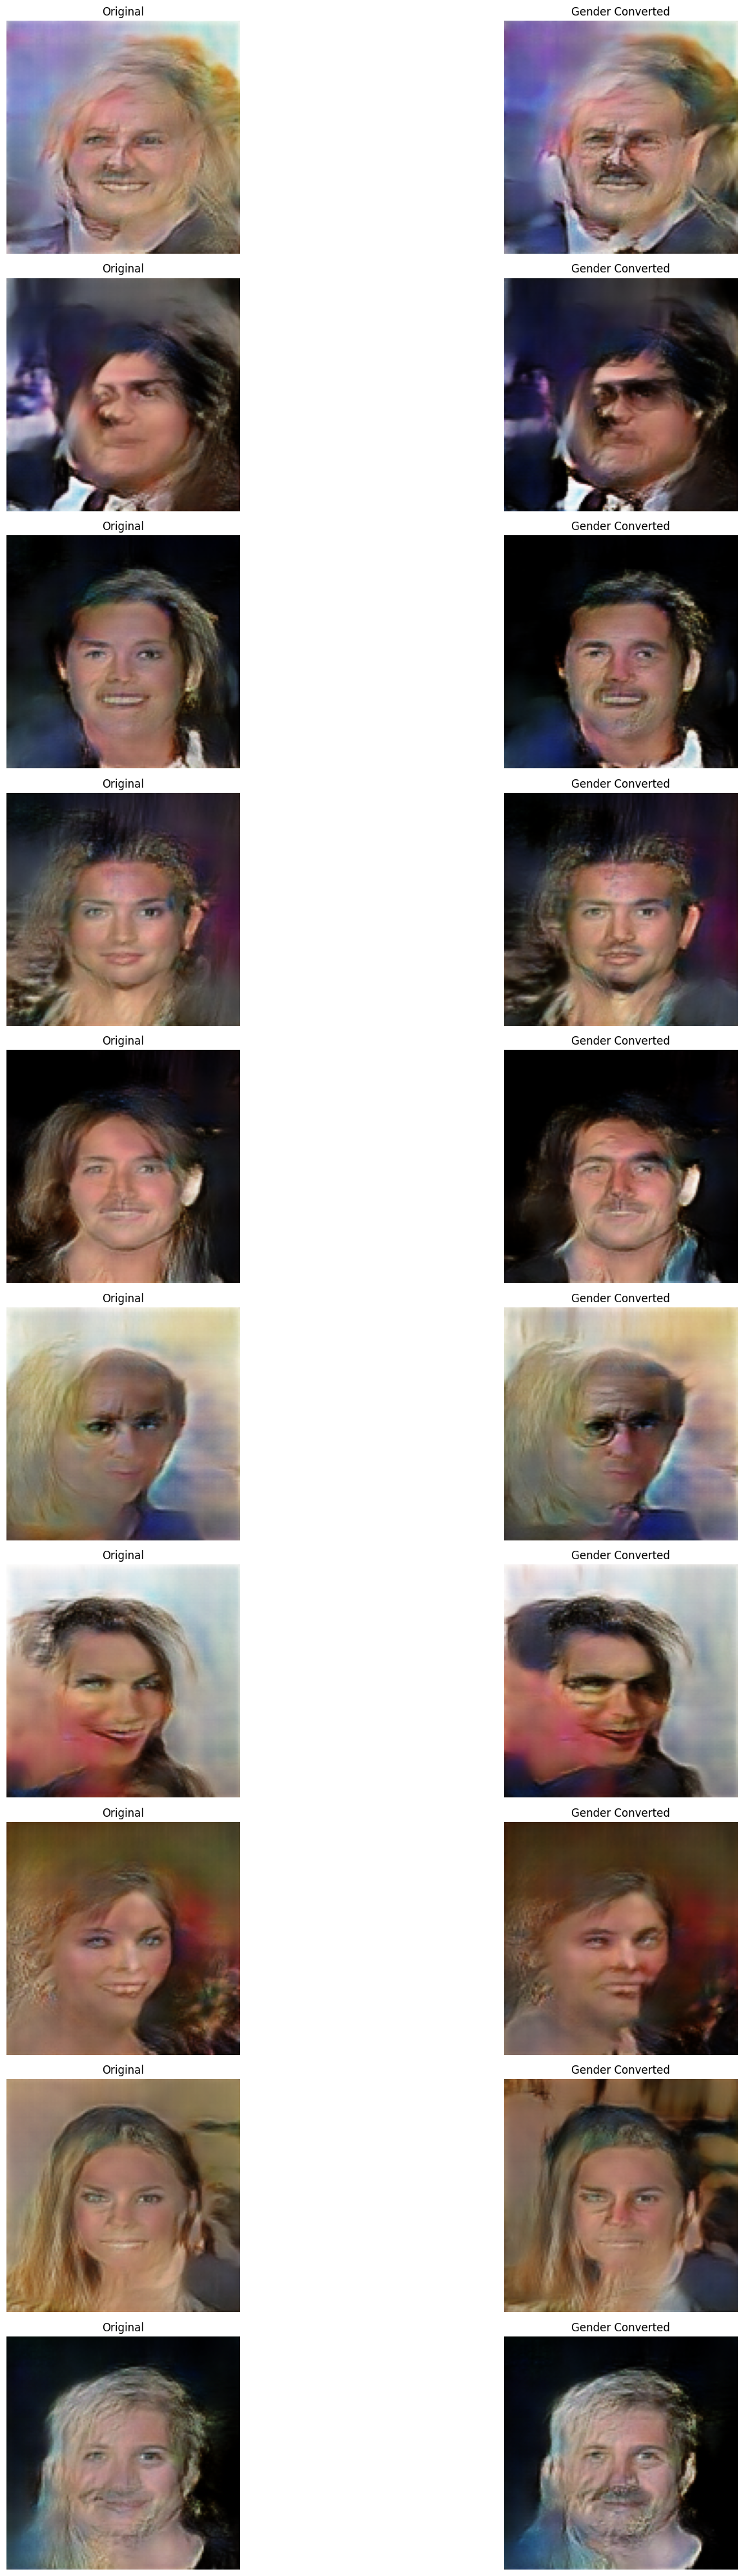

In [7]:
# Generate 10 Random Faces and Convert Genders
import matplotlib.pyplot as plt

num_faces = 10
latent_vectors = np.random.randn(num_faces, latent_dim)

# Interpolation factor for gender swap
alpha = 2.0  # positive → female, negative → male

plt.figure(figsize=(20, 4*num_faces))

for i, z in enumerate(latent_vectors):
    z = z.reshape(1, latent_dim)

    # Generate original face
    original_img = generator.predict(z)
    original_img = (original_img[0] + 1)/2  # scale to [0,1]

    # Generate gender-converted face
    z_gender = z + alpha * gender_vector
    gender_img = generator.predict(z_gender)
    gender_img = (gender_img[0] + 1)/2

    plt.subplot(num_faces, 2, 2*i+1)
    plt.imshow(original_img)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(num_faces, 2, 2*i+2)
    plt.imshow(gender_img)
    plt.title("Gender Converted")
    plt.axis('off')

plt.tight_layout()
plt.show()
